## Будникова Валерия Павловна М8О-407Б-19
## Лабораторная работа 5


In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


Train On Custom Data

### HOMEWORK
Скачать датасет с Kaggle (https://www.kaggle.com/competitions/tensorflow-great-barrier-reef/data). <br>
Подключить гугл диск к колабу.<br>
Закинуть на гугл диск часть изображений из скачанного датасета (train_images/video_0).<br>
Сгенерировать лейблы из файла train.csv такого формата, который нужен для обучения YOLO (только для video 0). Для каждого изображения из video_0 должен быть txt файл с таким же именем, который будет содержать разметку для всех объектов этого изображения<br>
Сложить данные так, как нужно для обучения модели (таким образом, чтобы при замене images в пути к картинкам на lables получались пути к лейблам, см. выше)<br>
Внести изменения в пути и количество классов и их название в файле coco128.yaml (или создать новый файл на подобие coco128.yaml, в котором будут пути к данным и тд) <br>
Запустить обучение YOLOv5 на наших данных. 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# /content/drive/MyDrive/data/tensorflow-great-barrier-reef/train.csv
import pandas as pd
import ast
from PIL import Image
from tqdm import tqdm


df = pd.read_csv('/content/drive/MyDrive/data/tensorflow-great-barrier-reef/train.csv')

df_video0 = df.loc[df['video_id'] == 0]

print("count rows: ", len(df_video0))

path = "/content/drive/MyDrive/data/tensorflow-great-barrier-reef/train_images/labels/"
path_img = "/content/drive/MyDrive/data/tensorflow-great-barrier-reef/train_images/images/"

    
im = Image.open(path_img + "0.jpg") 
w = im.size[0]
h = im.size[1]

for index, row in tqdm(df_video0.iterrows()):
    
    im_id = row['image_id'].split('-')[-1]
    file_name = im_id + ".txt"
    text = ast.literal_eval(row['annotations'])
    text_for_file = ''

    for i, t in enumerate(text):
      if i > 0: text_for_file += '\n'
      cl = str(0)
  
      x = str(t['x'] / w)
      y = str(t['y'] / h)
      width = str(t['width'] / w)
      height = str(t['height'] / h)
      
      text_for_file += cl + ' ' + x + ' ' + y + ' ' + width + ' ' + height

    f = open(path + file_name, 'w')
    f.write(text_for_file)
    f.close()



count rows:  6708


6708it [09:09, 12.22it/s]


In [4]:
!python train.py --img 640 --batch 32 --epochs 7 --data /content/drive/MyDrive/data/tensorflow-great-barrier-reef/y.yaml --weights yolov5s.pt

2023-04-03 16:41:41.347610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 16:41:42.746347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/data/tensorflow-great-barrier-reef/y.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=7, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, 

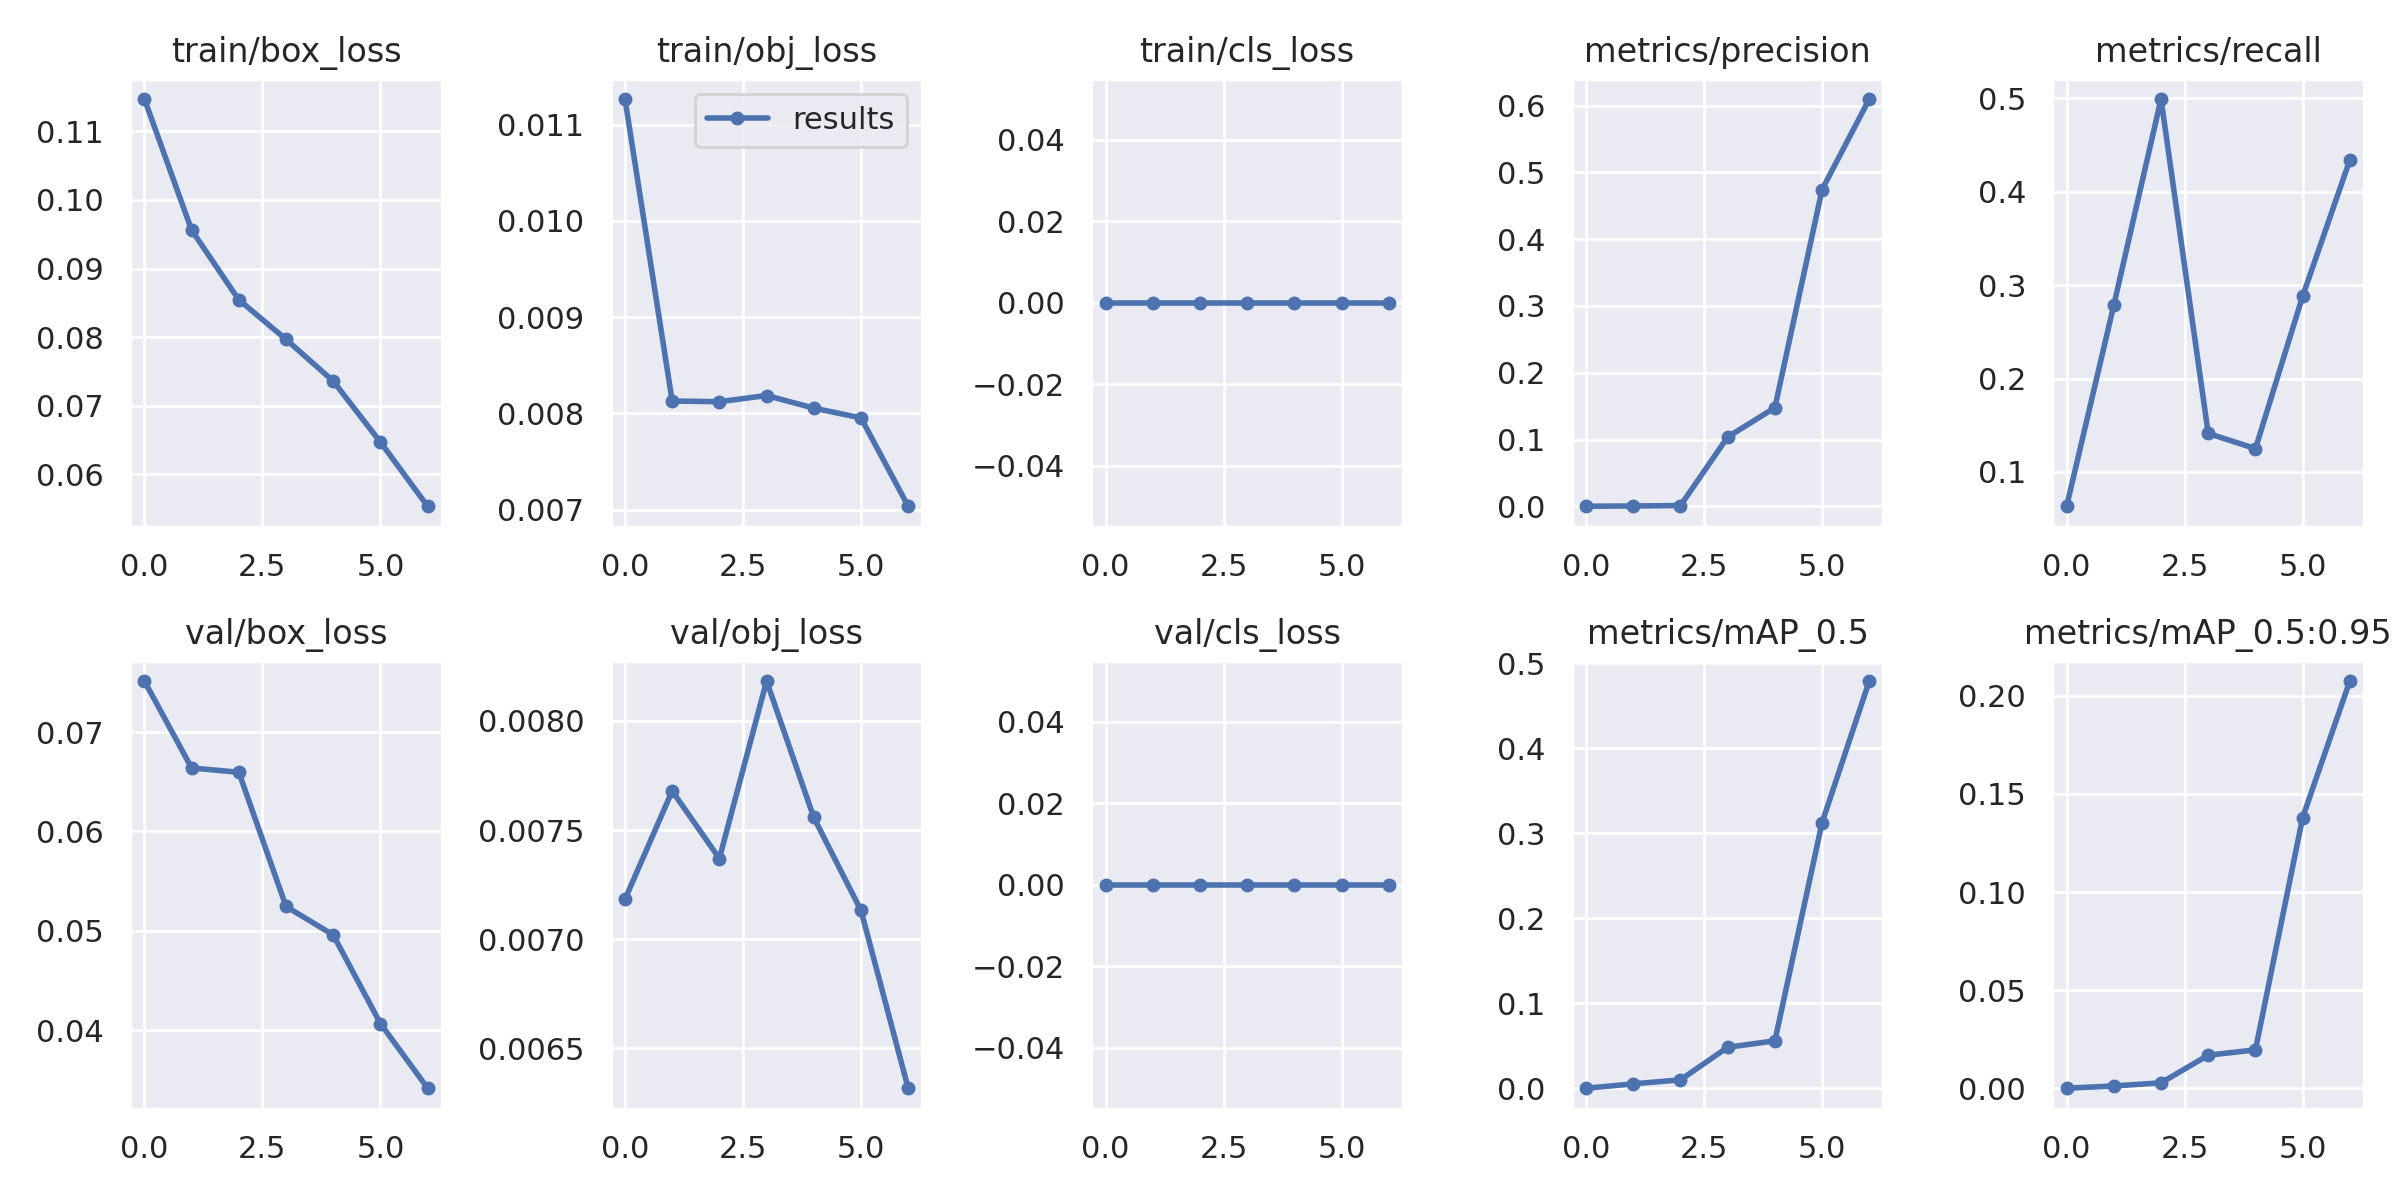

In [18]:
im = Image.open("/content/yolov5/runs/train/exp/results.png")

im.show()

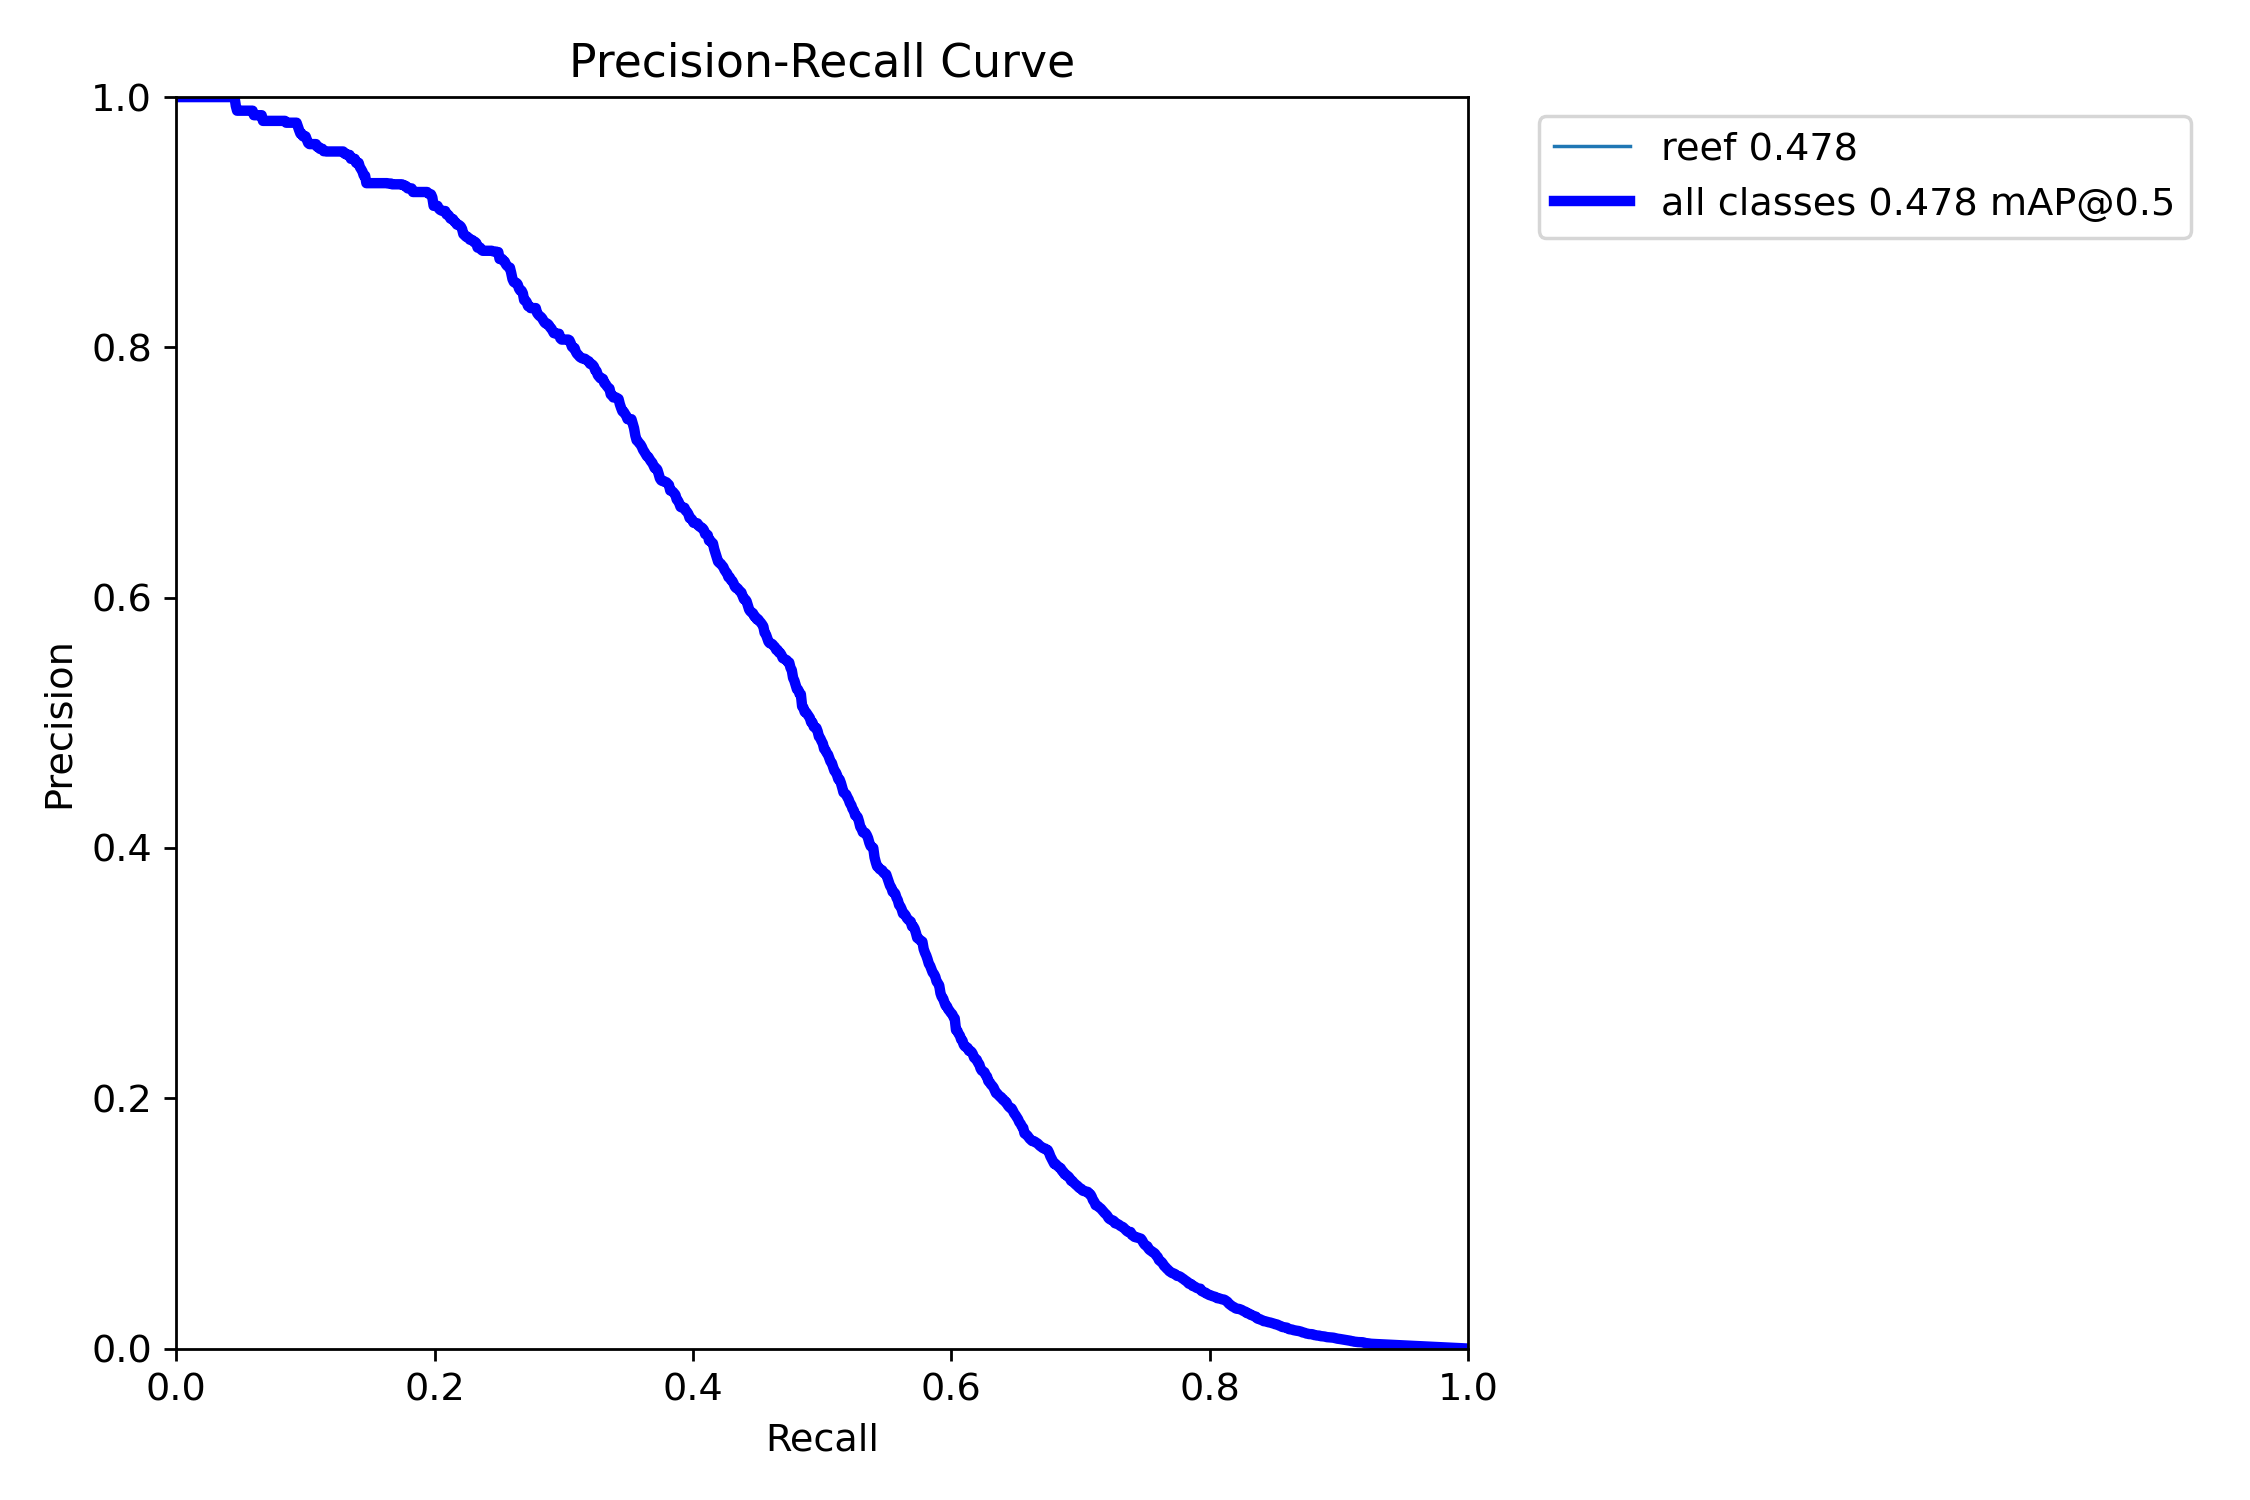

In [17]:
im = Image.open("/content/yolov5/runs/train/exp/PR_curve.png")

im.show()

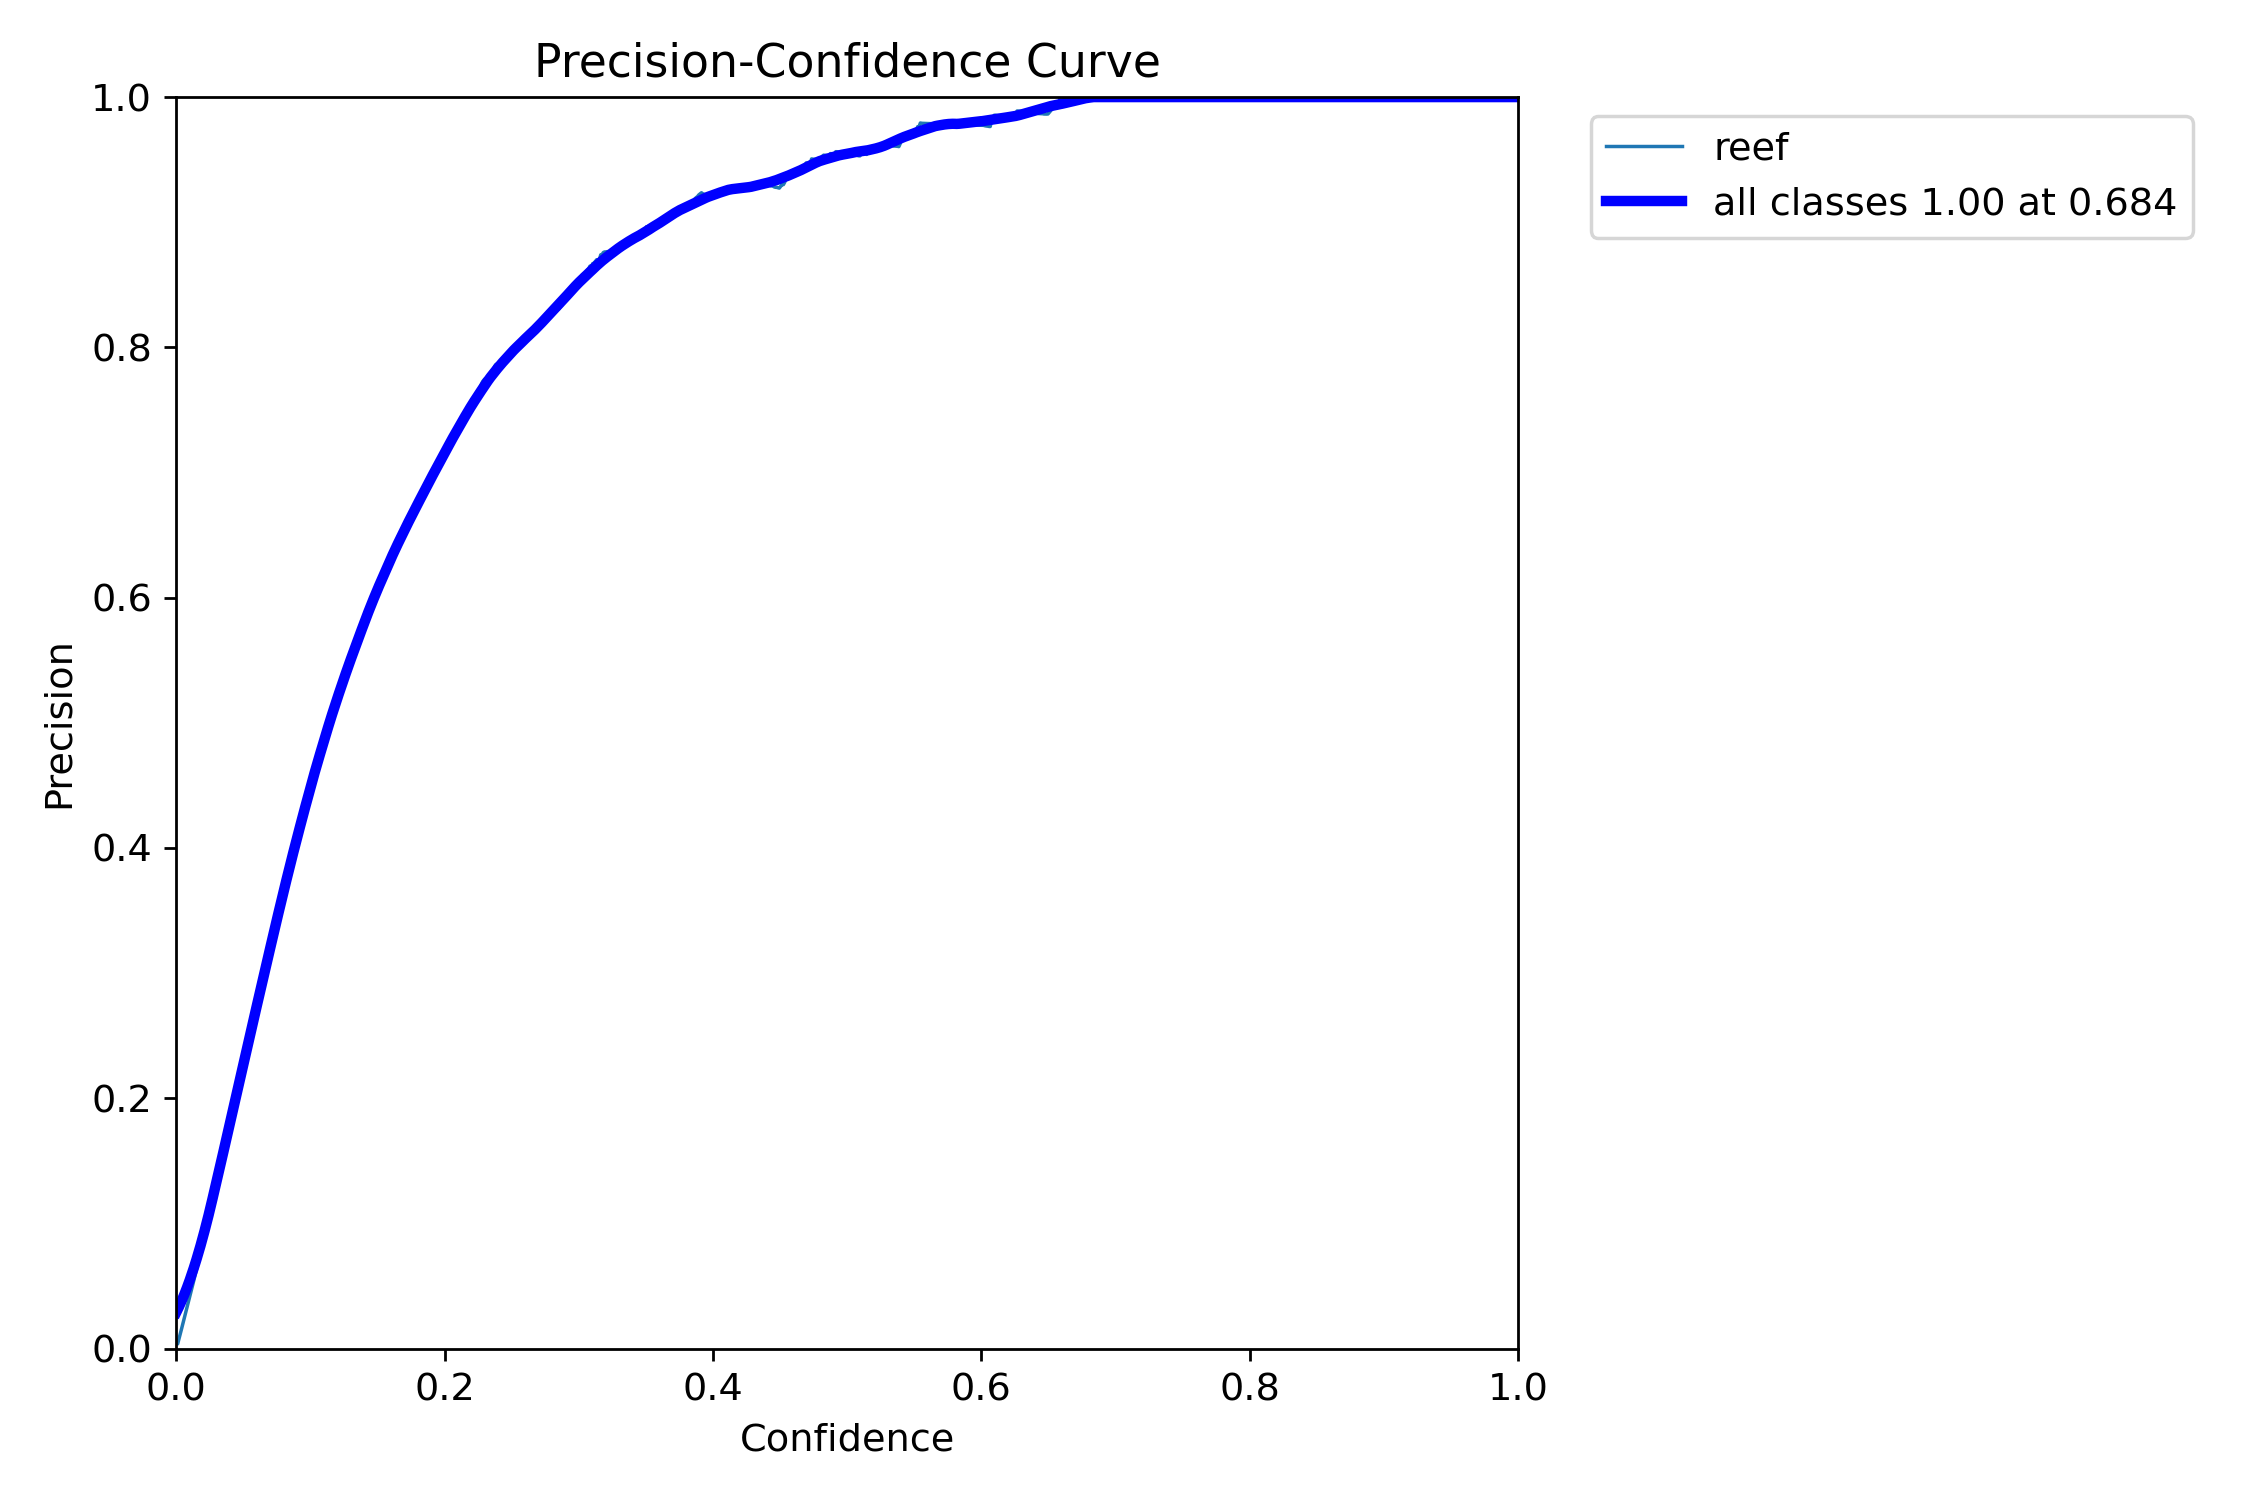

In [19]:
im = Image.open("/content/yolov5/runs/train/exp/P_curve.png")

im.show()